In [236]:
#--------------#
#  Price data  #  
#--------------# 

import bql
bq = bql.Service()

bql_item = bq.data.px_last(dates=bq.func.range(start='2010-01-01', end='2019-01-01'))

bql_universe = ['ITUB4 BZ Equity', 'BBAS3 BZ Equity', 'BBDC4 BZ Equity']

bql_request = bql.Request(bql_universe, bql_item)
bql_response = bq.execute(bql_request)
df_px = bql_response[0].df()

In [237]:
# Data wrangling:

df_px.reset_index(inplace=True)
df_px.dropna(axis=0, inplace=True)
df_px.columns = ['ID', 'Date', 'Currency', 'PX_Last']
df_px = df_px.pivot('Date', 'ID', 'PX_Last')

df_px.head()

ID,BBAS3 BZ Equity,BBDC4 BZ Equity,ITUB4 BZ Equity
Date,,,
2010-01-04,29.90,13.379405,18.268333
2010-01-05,29.60,13.308427,18.386722
2010-01-06,29.64,13.201960,18.227352
2010-01-07,29.65,13.166470,18.040662
2010-01-08,29.82,13.152275,17.767457


In [238]:
#------------------------#
#  Price weighted index  #
#------------------------#

# Adding columns:
df_px['PX_Sum'] = df_px.sum(axis=1)
df_px.head()

# Creating the Price weighted index:
pwi_d0 = 1000

# Divisor (constant):
px_sum_d0 = df_px['PX_Sum'].iloc[0]
pwi_div = px_sum_d0 / pwi_d0

# PWI column:
df_px['PWI'] = df_px['PX_Sum'] / pwi_div

df_px.head()

ID,BBAS3 BZ Equity,BBDC4 BZ Equity,ITUB4 BZ Equity,PX_Sum,PWI
Date,,,,,
2010-01-04,29.90,13.379405,18.268333,61.547739,1000.000000
2010-01-05,29.60,13.308427,18.386722,61.295149,995.896043
2010-01-06,29.64,13.201960,18.227352,61.069312,992.226741
2010-01-07,29.65,13.166470,18.040662,60.857133,988.779344
2010-01-08,29.82,13.152275,17.767457,60.739732,986.871865


In [239]:
import bqviz as bqv

line_plot = bqv.LinePlot(df_px).set_style()
line_plot.show()

GridBox(children=(Figure(animation_duration=500, axes=[Axis(color='white', grid_color='#3c3c3c', grid_lines='d…

[]

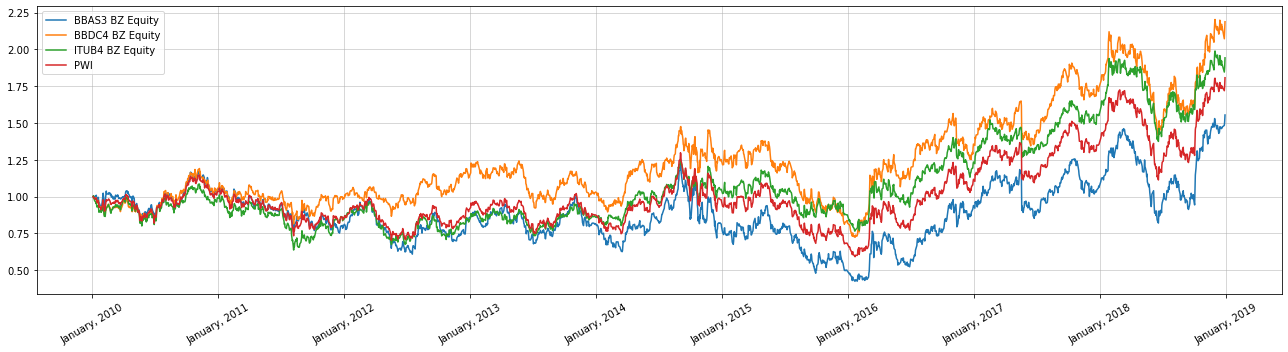

In [240]:
# Matplotlib:
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
import datetime

cols = ['BBAS3 BZ Equity',
        'BBDC4 BZ Equity',	
        'ITUB4 BZ Equity',
        'PWI']

df_px_cols = df_px.loc[:, cols]

plt.figure(figsize=(18, 5))
format = mpl_dates.DateFormatter('%B, %Y')
plt.gca().xaxis.set_major_formatter(format)

for col in cols:
    col_zero = df_px_cols[col].iloc[0]
    plt.plot(df_px_cols.index, df_px_cols[col]/col_zero, label=col)


plt.tick_params(axis='x', rotation=30)
plt.grid(linewidth=0.5)
plt.legend()
plt.tight_layout()    
plt.plot()

In [241]:
#------------------------------#
#  Market Capitalization Data  #
#------------------------------#

bql_item = bq.data.cur_mkt_cap(dates=bq.func.range(start='2010-01-01', end='2019-01-01'))
bql_universe = ['ITUB4 BZ Equity', 'BBAS3 BZ Equity', 'BBDC4 BZ Equity']

bql_request = bql.Request(bql_universe, bql_item)
bql_response = bq.execute(bql_request)

df_mkt = bql_response[0].df()

In [242]:
# Data wrangling:

df_mkt.reset_index(inplace=True)
df_mkt.dropna(axis=0, inplace=True)
df_mkt.columns = ['ID', 'Date', 'Currency', 'Mkt Cap']
df_mkt = df_mkt.pivot('Date', 'ID', 'Mkt Cap')

df_mkt.head()

ID,BBAS3 BZ Equity,BBDC4 BZ Equity,ITUB4 BZ Equity
Date,,,
2010-01-04,7.678878e+10,1.070185e+11,1.626221e+11
2010-01-05,7.601832e+10,1.060216e+11,1.633298e+11
2010-01-06,7.612105e+10,1.052738e+11,1.625312e+11
2010-01-07,7.614673e+10,1.050090e+11,1.609090e+11
2010-01-08,7.658332e+10,1.050090e+11,1.587387e+11


In [243]:
#----------------------------------------#
#  Market Capitalization Weighted Index  #
#----------------------------------------#

# Adding columns:
df_mkt['Sum_Mkt_Cap'] = df_mkt.sum(axis=1)

# Creating the market capitalization weighted index:
mcwi_d0 = 1000

# Divisor (constant):
mcwi_sum_d0 = df_mkt['Sum_Mkt_Cap'].iloc[0]
mkt_cap_div = mcwi_sum_d0 / mcwi_d0

# MCWI column:
df_mkt['MCWI'] = df_mkt['Sum_Mkt_Cap'] / mkt_cap_div
df_mkt.head()

ID,BBAS3 BZ Equity,BBDC4 BZ Equity,ITUB4 BZ Equity,Sum_Mkt_Cap,MCWI
Date,,,,,
2010-01-04,7.678878e+10,1.070185e+11,1.626221e+11,3.464294e+11,1000.000000
2010-01-05,7.601832e+10,1.060216e+11,1.633298e+11,3.453697e+11,996.940984
2010-01-06,7.612105e+10,1.052738e+11,1.625312e+11,3.439261e+11,992.773966
2010-01-07,7.614673e+10,1.050090e+11,1.609090e+11,3.420647e+11,987.400864
2010-01-08,7.658332e+10,1.050090e+11,1.587387e+11,3.403311e+11,982.396531


In [244]:
line_plot = bqv.LinePlot(df_mkt).set_style()
line_plot.show()

GridBox(children=(Figure(animation_duration=500, axes=[Axis(color='white', grid_color='#3c3c3c', grid_lines='d…

[]

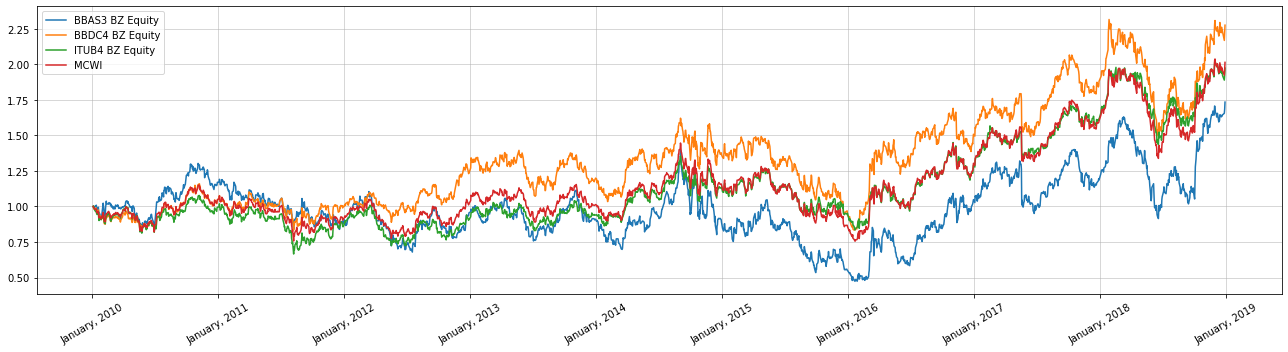

In [245]:
# Matplotlib:

cols = ['BBAS3 BZ Equity',
        'BBDC4 BZ Equity',	
        'ITUB4 BZ Equity',
        'MCWI']

df_mkt_cols = df_mkt.loc[:, cols]

plt.figure(figsize=(18, 5))
format = mpl_dates.DateFormatter('%B, %Y')
plt.gca().xaxis.set_major_formatter(format)

for col in cols:
    col_zero = df_mkt_cols[col].iloc[0]
    plt.plot(df_mkt_cols.index, df_mkt_cols[col]/col_zero, label=col)


plt.tick_params(axis='x', rotation=30)
plt.grid(linewidth=0.5)
plt.legend()
plt.tight_layout()    
plt.plot()

In [246]:
import pandas as pd 

df_px_f1 = df_px.iloc[:, :3]

cols_f1 = []
px_cols_f1 = df_px_f1.columns
for col in px_cols_f1:
    new_col = col + '_PX'
    cols_f1.append(new_col)

df_px_f1.columns = cols_f1

# MCWI:

df_main = pd.merge(df_px_f1, df_mkt['MCWI'], how='left', left_index=True, right_index=True)
df_main.head()

,BBAS3 BZ Equity_PX,BBDC4 BZ Equity_PX,ITUB4 BZ Equity_PX,MCWI
Date,,,,
2010-01-04,29.90,13.379405,18.268333,1000.000000
2010-01-05,29.60,13.308427,18.386722,996.940984
2010-01-06,29.64,13.201960,18.227352,992.773966
2010-01-07,29.65,13.166470,18.040662,987.400864
2010-01-08,29.82,13.152275,17.767457,982.396531


[]

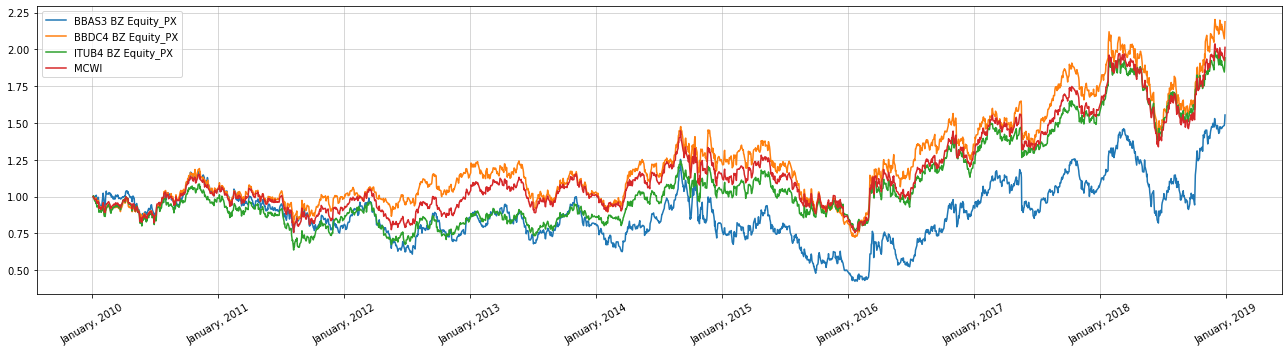

In [247]:
# Matplotlib:

cols = ['BBAS3 BZ Equity_PX',
        'BBDC4 BZ Equity_PX',	
        'ITUB4 BZ Equity_PX',
        'MCWI']

df_mkt_cols = df_main.loc[:, cols]

plt.figure(figsize=(18, 5))
format = mpl_dates.DateFormatter('%B, %Y')
plt.gca().xaxis.set_major_formatter(format)

for col in cols:
    col_zero = df_mkt_cols[col].iloc[0]
    plt.plot(df_main.index, df_main[col]/col_zero, label=col)


plt.tick_params(axis='x', rotation=30)
plt.grid(linewidth=0.5)
plt.legend()
plt.tight_layout() 
plt.plot()